In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('aviasales_data_t.csv')
df.head()

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
0,MOW,LED,2021-03-06T18:45:00Z,DP,205,3568,2021-03-06T13:24:28Z,21-03-06T10:28:54Z
1,MOW,LED,2021-03-07T04:20:00Z,U6,9631,2438,2021-03-07T04:20:00Z,21-03-06T10:28:54Z
2,MOW,LED,2021-03-08T03:45:00Z,DP,201,2411,2021-03-08T03:45:00Z,21-03-06T10:28:54Z
3,MOW,LED,2021-03-09T05:10:00Z,DP,207,2618,2021-03-09T05:10:00Z,21-03-06T10:28:54Z
4,MOW,LED,2021-03-10T04:30:00Z,DP,209,2468,2021-03-09T06:15:06Z,21-03-06T10:28:54Z


In [ ]:
led = df.loc[df['origin'] == 'LED']

In [ ]:
led_aer = led.loc[df['destination'] == 'AER']

In [ ]:
led_aer

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
1562,LED,AER,2021-03-06T19:25:00Z,DP,208,10208,2021-03-06T19:25:00Z,21-03-06T10:28:54Z
1563,LED,AER,2021-03-07T14:30:00Z,S7,1014,8906,2021-03-07T14:30:00Z,21-03-06T10:28:54Z
1564,LED,AER,2021-03-08T13:50:00Z,WZ,735,8037,2021-03-08T10:01:14Z,21-03-06T10:28:54Z
1565,LED,AER,2021-03-09T19:55:00Z,S7,1020,6996,2021-03-06T14:54:58Z,21-03-06T10:28:54Z
1566,LED,AER,2021-03-10T09:20:00Z,S7,1010,6996,2021-03-07T15:46:12Z,21-03-06T10:28:54Z
...,...,...,...,...,...,...,...,...
216146,LED,AER,2021-03-31T04:50:00Z,WZ,703,6974,2021-03-31T04:50:00Z,21-03-30T18:30:03Z
216245,LED,AER,2021-03-31T04:50:00Z,WZ,703,6974,2021-03-31T04:50:00Z,21-03-31T00:30:04Z
216321,LED,AER,2021-03-31T17:00:00Z,DP,305,8061,2021-03-31T17:00:00Z,21-03-31T06:30:03Z
216394,LED,AER,2021-03-31T17:00:00Z,DP,305,8061,2021-03-31T17:00:00Z,21-03-31T12:30:06Z


In [ ]:
led_aer['departure_time'] = pd.to_datetime(led_aer['departure_at'], errors='coerce')
led_aer['requested_time'] = pd.to_datetime('20' + led_aer['requested_at'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
led_aer['before_flight'] = (led_aer['departure_time'] - led_aer['requested_time']).apply(lambda x: x.total_seconds() / 3600)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
led_aer

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at,departure_time,requested_time,before_flight
1562,LED,AER,2021-03-06T19:25:00Z,DP,208,10208,2021-03-06T19:25:00Z,21-03-06T10:28:54Z,2021-03-06 19:25:00+00:00,2021-03-06 10:28:54+00:00,8.935000
1563,LED,AER,2021-03-07T14:30:00Z,S7,1014,8906,2021-03-07T14:30:00Z,21-03-06T10:28:54Z,2021-03-07 14:30:00+00:00,2021-03-06 10:28:54+00:00,28.018333
1564,LED,AER,2021-03-08T13:50:00Z,WZ,735,8037,2021-03-08T10:01:14Z,21-03-06T10:28:54Z,2021-03-08 13:50:00+00:00,2021-03-06 10:28:54+00:00,51.351667
1565,LED,AER,2021-03-09T19:55:00Z,S7,1020,6996,2021-03-06T14:54:58Z,21-03-06T10:28:54Z,2021-03-09 19:55:00+00:00,2021-03-06 10:28:54+00:00,81.435000
1566,LED,AER,2021-03-10T09:20:00Z,S7,1010,6996,2021-03-07T15:46:12Z,21-03-06T10:28:54Z,2021-03-10 09:20:00+00:00,2021-03-06 10:28:54+00:00,94.851667
...,...,...,...,...,...,...,...,...,...,...,...
216146,LED,AER,2021-03-31T04:50:00Z,WZ,703,6974,2021-03-31T04:50:00Z,21-03-30T18:30:03Z,2021-03-31 04:50:00+00:00,2021-03-30 18:30:03+00:00,10.332500
216245,LED,AER,2021-03-31T04:50:00Z,WZ,703,6974,2021-03-31T04:50:00Z,21-03-31T00:30:04Z,2021-03-31 04:50:00+00:00,2021-03-31 00:30:04+00:00,4.332222
216321,LED,AER,2021-03-31T17:00:00Z,DP,305,8061,2021-03-31T17:00:00Z,21-03-31T06:30:03Z,2021-03-31 17:00:00+00:00,2021-03-31 06:30:03+00:00,10.499167
216394,LED,AER,2021-03-31T17:00:00Z,DP,305,8061,2021-03-31T17:00:00Z,21-03-31T12:30:06Z,2021-03-31 17:00:00+00:00,2021-03-31 12:30:06+00:00,4.498333


In [ ]:
led_aer['departure_hour'] = led_aer['departure_time'].apply(lambda x: x.hour)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
led_aer

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at,departure_time,requested_time,before_flight,departure_hour
1562,LED,AER,2021-03-06T19:25:00Z,DP,208,10208,2021-03-06T19:25:00Z,21-03-06T10:28:54Z,2021-03-06 19:25:00+00:00,2021-03-06 10:28:54+00:00,8.935000,19
1563,LED,AER,2021-03-07T14:30:00Z,S7,1014,8906,2021-03-07T14:30:00Z,21-03-06T10:28:54Z,2021-03-07 14:30:00+00:00,2021-03-06 10:28:54+00:00,28.018333,14
1564,LED,AER,2021-03-08T13:50:00Z,WZ,735,8037,2021-03-08T10:01:14Z,21-03-06T10:28:54Z,2021-03-08 13:50:00+00:00,2021-03-06 10:28:54+00:00,51.351667,13
1565,LED,AER,2021-03-09T19:55:00Z,S7,1020,6996,2021-03-06T14:54:58Z,21-03-06T10:28:54Z,2021-03-09 19:55:00+00:00,2021-03-06 10:28:54+00:00,81.435000,19
1566,LED,AER,2021-03-10T09:20:00Z,S7,1010,6996,2021-03-07T15:46:12Z,21-03-06T10:28:54Z,2021-03-10 09:20:00+00:00,2021-03-06 10:28:54+00:00,94.851667,9
...,...,...,...,...,...,...,...,...,...,...,...,...
216146,LED,AER,2021-03-31T04:50:00Z,WZ,703,6974,2021-03-31T04:50:00Z,21-03-30T18:30:03Z,2021-03-31 04:50:00+00:00,2021-03-30 18:30:03+00:00,10.332500,4
216245,LED,AER,2021-03-31T04:50:00Z,WZ,703,6974,2021-03-31T04:50:00Z,21-03-31T00:30:04Z,2021-03-31 04:50:00+00:00,2021-03-31 00:30:04+00:00,4.332222,4
216321,LED,AER,2021-03-31T17:00:00Z,DP,305,8061,2021-03-31T17:00:00Z,21-03-31T06:30:03Z,2021-03-31 17:00:00+00:00,2021-03-31 06:30:03+00:00,10.499167,17
216394,LED,AER,2021-03-31T17:00:00Z,DP,305,8061,2021-03-31T17:00:00Z,21-03-31T12:30:06Z,2021-03-31 17:00:00+00:00,2021-03-31 12:30:06+00:00,4.498333,17


In [ ]:
led_aer['week_day'] = led_aer['departure_time'].apply(lambda x: str(x.weekday()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
led_aer.tail(30)

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at,departure_time,requested_time,before_flight,departure_hour,week_day,flight,train
214049,LED,AER,2021-03-31T04:50:00Z,WZ,703,8204,2021-03-30T21:55:52Z,21-03-28T06:30:03Z,2021-03-31 04:50:00+00:00,2021-03-28 06:30:03+00:00,70.332500,4,2,WZ703,False
214341,LED,AER,2021-03-28T17:00:00Z,DP,305,7723,2021-03-28T17:00:00Z,21-03-28T12:30:04Z,2021-03-28 17:00:00+00:00,2021-03-28 12:30:04+00:00,4.498889,17,6,DP305,True
214342,LED,AER,2021-03-29T17:00:00Z,DP,305,7723,2021-03-29T17:00:00Z,21-03-28T12:30:04Z,2021-03-29 17:00:00+00:00,2021-03-28 12:30:04+00:00,28.498889,17,0,DP305,False
214343,LED,AER,2021-03-30T10:30:00Z,FV,5615,7192,2021-03-30T10:30:00Z,21-03-28T12:30:04Z,2021-03-30 10:30:00+00:00,2021-03-28 12:30:04+00:00,45.998889,10,1,FV5615,False
214344,LED,AER,2021-03-31T17:00:00Z,DP,305,8180,2021-03-31T05:35:38Z,21-03-28T12:30:04Z,2021-03-31 17:00:00+00:00,2021-03-28 12:30:04+00:00,76.498889,17,2,DP305,False
214627,LED,AER,2021-03-29T19:25:00Z,S7,1020,7232,2021-03-29T19:25:00Z,21-03-28T18:30:03Z,2021-03-29 19:25:00+00:00,2021-03-28 18:30:03+00:00,24.915833,19,0,S71020,False
214628,LED,AER,2021-03-30T10:30:00Z,FV,5615,6815,2021-03-30T10:30:00Z,21-03-28T18:30:03Z,2021-03-30 10:30:00+00:00,2021-03-28 18:30:03+00:00,39.999167,10,1,FV5615,False
214629,LED,AER,2021-03-31T10:15:00Z,FV,5605,7466,2021-03-31T10:05:27Z,21-03-28T18:30:03Z,2021-03-31 10:15:00+00:00,2021-03-28 18:30:03+00:00,63.749167,10,2,FV5605,False
214860,LED,AER,2021-03-29T19:25:00Z,S7,1020,7232,2021-03-29T19:25:00Z,21-03-29T00:30:03Z,2021-03-29 19:25:00+00:00,2021-03-29 00:30:03+00:00,18.915833,19,0,S71020,False
214861,LED,AER,2021-03-30T04:50:00Z,WZ,703,7794,2021-03-30T04:50:00Z,21-03-29T00:30:03Z,2021-03-30 04:50:00+00:00,2021-03-29 00:30:03+00:00,28.332500,4,1,WZ703,False


In [ ]:
led_aer['flight'] = led_aer['airline'] + led_aer['flight_number']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def get_int(s):
  try:
    return int(s)
  except:
    return None

In [ ]:
led_aer['price'] = led_aer['price'].apply(lambda x: get_int(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
len(led_aer['flight'].unique())

88

In [ ]:
led_aer['train'] = led_aer['departure_time'] < pd.to_datetime('2021-03-29T17:00:00Z')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data =  led_aer[['airline', 'price', 'before_flight', 'departure_hour', 'week_day', 'train']]


In [ ]:
data = pd.get_dummies(data)

In [ ]:
train = data.loc[data['train']]
train.head()

,price,before_flight,departure_hour,train,airline_5N,airline_6R,airline_7R,airline_A4,airline_DP,airline_FV,airline_I8,airline_N4,airline_S7,airline_SU,airline_TK,airline_U6,airline_UT,airline_WZ,airline_Y7,airline_ZF,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6
1562,10208,8.935000,19,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1563,8906,28.018333,14,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1564,8037,51.351667,13,True,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1565,6996,81.435000,19,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1566,6996,94.851667,9,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
y_train = train['price']
x_train = train.drop('price', axis = 1)

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf.feature_importances_

array([2.82422842e-01, 3.38015874e-01, 0.00000000e+00, 6.12310003e-05,
       9.28414485e-03, 6.95877926e-03, 6.12953687e-03, 1.64954012e-02,
       2.79498809e-03, 6.37321881e-04, 1.34498660e-03, 1.91244189e-02,
       0.00000000e+00, 0.00000000e+00, 6.68889753e-02, 1.36668603e-02,
       8.87027688e-03, 1.74373025e-03, 0.00000000e+00, 1.71890230e-02,
       2.76384535e-02, 3.06675371e-02, 2.00117872e-02, 7.95865999e-02,
       2.53577103e-02, 2.51095220e-02])

In [ ]:
print(((rf.predict(x_train)-y_train)**2).mean()**0.5)

545.8870270820875


In [ ]:
cur_flight = led_aer[led_aer['departure_time'] == pd.to_datetime('2021-03-31T10:15:00Z')]

In [ ]:
cur_flight

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at,departure_time,requested_time,before_flight,departure_hour,week_day,flight,train
214629,LED,AER,2021-03-31T10:15:00Z,FV,5605,7466,2021-03-31T10:05:27Z,21-03-28T18:30:03Z,2021-03-31 10:15:00+00:00,2021-03-28 18:30:03+00:00,63.749167,10,2,FV5605,False
214862,LED,AER,2021-03-31T10:15:00Z,FV,5605,7466,2021-03-31T10:15:00Z,21-03-29T00:30:03Z,2021-03-31 10:15:00+00:00,2021-03-29 00:30:03+00:00,57.749167,10,2,FV5605,False
215309,LED,AER,2021-03-31T10:15:00Z,FV,5605,6505,2021-03-31T10:15:00Z,21-03-29T12:30:03Z,2021-03-31 10:15:00+00:00,2021-03-29 12:30:03+00:00,45.749167,10,2,FV5605,False
215848,LED,AER,2021-03-31T10:15:00Z,FV,5605,4594,2021-03-31T10:15:00Z,21-03-30T06:30:04Z,2021-03-31 10:15:00+00:00,2021-03-30 06:30:04+00:00,27.748889,10,2,FV5605,False


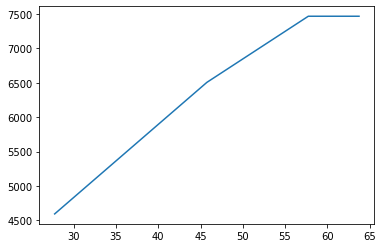

In [ ]:

plt.plot(cur_flight['before_flight'], cur_flight['price'])

In [ ]:
flight = data.loc[214629][1:]
for time in np.linspace(0, 65, 10):
  flight[0] = time
  price = rf.predict(np.array([flight]))
  print(price)

[10928.1]
[9922.86]
[8459.07]
[8208.39]
[8307.25]
[8299.]
[8329.55]
[8454.16]
[8333.23]
[8409.44]


In [ ]:
test = data.loc[data['train'] == False]
y_test = test['price']
x_test = test.drop('price', axis = 1)

In [ ]:
print(((rf.predict(x_test)-y_test)).mean())

-1769.4605555006824
